In [2]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
#Import data
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [4]:
#Display training set
display(df_train)

,Income,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Country
0,<=50K,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,<=50K,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,<=50K,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,<=50K,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,<=50K,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,<=50K,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,<=50K,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,>50K,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,>50K,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,>50K,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [5]:
#Get information about each column including data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Income            32561 non-null object
Age               32561 non-null int64
Workclass         32561 non-null object
Fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Marital-Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital-Gain      32561 non-null int64
Capital-Loss      32561 non-null int64
Hours-Per-Week    32561 non-null int64
Country           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Replace <=50K with 0 and >50K with 1
replacements = {
  ' <=50K':0,
  ' >50K':1,
}
df_train['Income'].replace(replacements, inplace=True)

In [7]:
#Replace ? (missing values) with NaN
df_train2=df_train.replace(" ?",np.NaN)

In [8]:
#Display new dataframe
display(df_train2)

,Income,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Country
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,0,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,0,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,1,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,1,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,1,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [9]:
#Count the number of records of each attribute
df_train2.count()

Income            32561
Age               32561
Workclass         30725
Fnlwgt            32561
Education         32561
Education-Num     32561
Marital-Status    32561
Occupation        30718
Relationship      32561
Race              32561
Sex               32561
Capital-Gain      32561
Capital-Loss      32561
Hours-Per-Week    32561
Country           31978
dtype: int64

In [10]:
#Find number of missing values in the dataset
df_train2.isnull().sum()

Income               0
Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-Num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-Per-Week       0
Country            583
dtype: int64

In [11]:
#Create a dataframe with only the numeric columns
numeric_train = pd.DataFrame(df_train2,columns=['Age','Fnlwgt','Education-Num','Capital-Gain','Capital-Loss','Hours-Per-Week','Income'])

In [12]:
#Create five number summary of the numeric attributes
numeric_train.describe()

,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [13]:
#UNIVARITE ANALYSIS

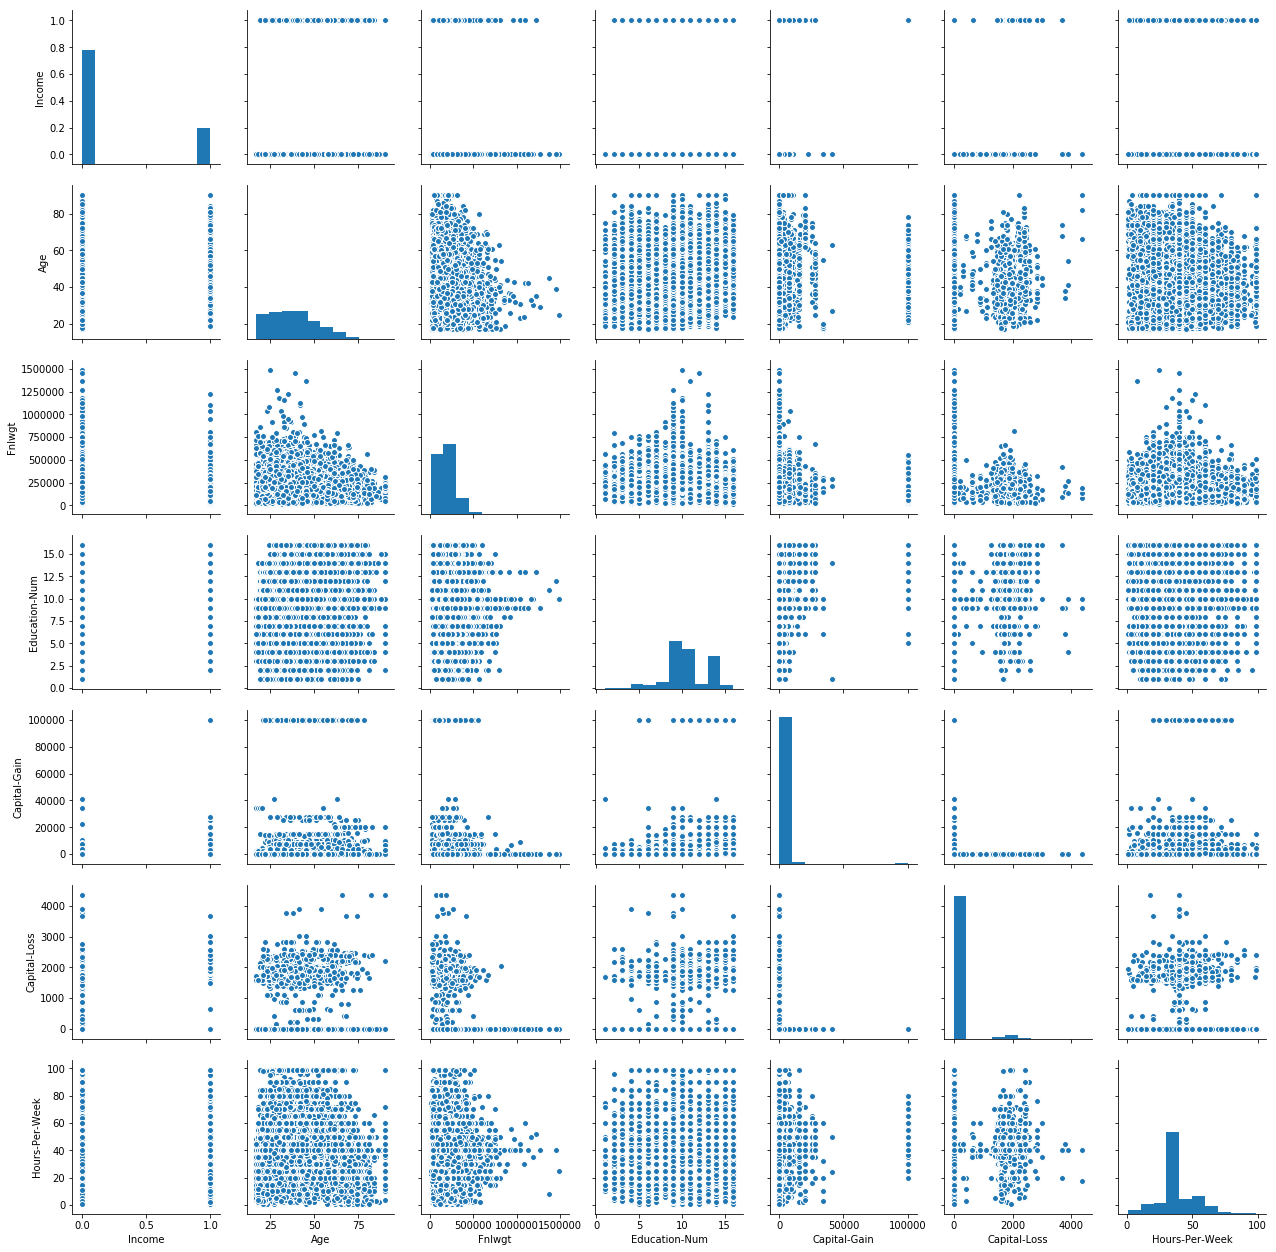

In [14]:
g = sns.pairplot(df_train2)

{'whiskers': [<matplotlib.lines.Line2D at 0x2758b3e8518>,
 'caps': [<matplotlib.lines.Line2D at 0x2758b8aecf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2758b406390>],
 'medians': [<matplotlib.lines.Line2D at 0x2758b75ce80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2758b76ff60>],
 'means': []}

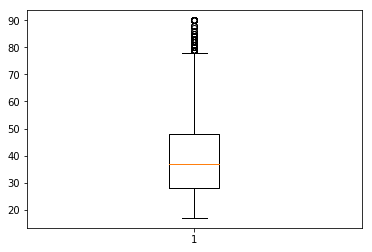

In [15]:
#Boxplot of numeric values- Age
plt.boxplot(df_train2['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2758b925ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x2758b92d4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2758b925a58>],
 'medians': [<matplotlib.lines.Line2D at 0x2758b92dcf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2758b939160>],
 'means': []}

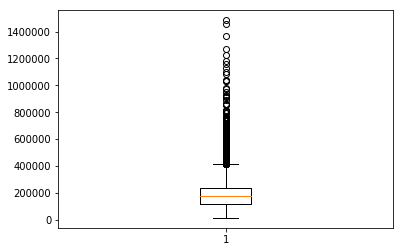

In [16]:
#Boxplot of numeric values- Fnlwgt
plt.boxplot(df_train2['Fnlwgt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2758b9859b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2758b9902b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2758b985860>],
 'medians': [<matplotlib.lines.Line2D at 0x2758b990b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2758b990f28>],
 'means': []}

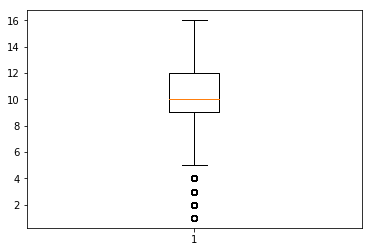

In [17]:
#Boxplot of numeric values- Education-Num
plt.boxplot(df_train2['Education-Num'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2758dfd5278>,
 'caps': [<matplotlib.lines.Line2D at 0x2758dfd5b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x2758dfd5128>],
 'medians': [<matplotlib.lines.Line2D at 0x2758dfdf3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2758dfdf7f0>],
 'means': []}

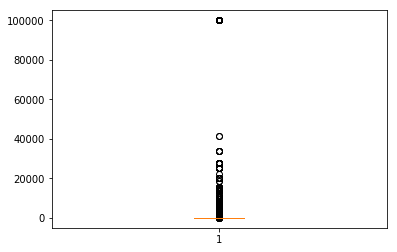

In [18]:
#Boxplot of numeric values- Capital-Gain
plt.boxplot(df_train2['Capital-Gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2758e02f668>,
 'caps': [<matplotlib.lines.Line2D at 0x2758e02ff28>,
 'boxes': [<matplotlib.lines.Line2D at 0x2758e02f518>],
 'medians': [<matplotlib.lines.Line2D at 0x2758e0387b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2758e038be0>],
 'means': []}

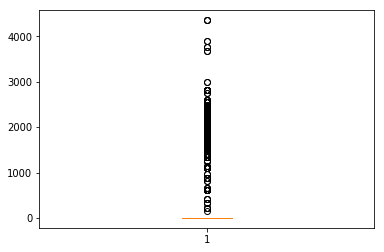

In [19]:
#Boxplot of numeric values- Capital-Loss
plt.boxplot(df_train2['Capital-Loss'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2758e0845f8>,
 'caps': [<matplotlib.lines.Line2D at 0x2758e084eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2758e0844a8>],
 'medians': [<matplotlib.lines.Line2D at 0x2758e08e748>],
 'fliers': [<matplotlib.lines.Line2D at 0x2758e08eb70>],
 'means': []}

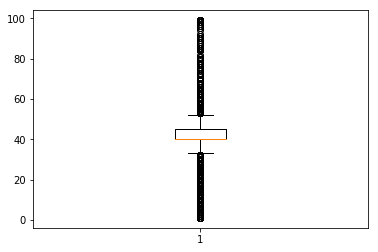

In [20]:
#Boxplot of numeric values- Hours-Per-Week
plt.boxplot(df_train2['Hours-Per-Week'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2758e0dcac8>,
 'caps': [<matplotlib.lines.Line2D at 0x2758e0e43c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2758e0dc978>],
 'medians': [<matplotlib.lines.Line2D at 0x2758e0e4c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x2758e0ee080>],
 'means': []}

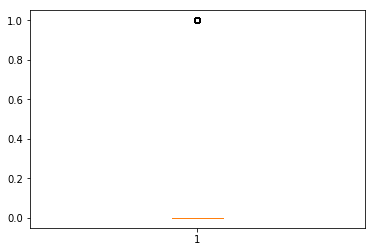

In [21]:
#Boxplot of numeric values- Income
plt.boxplot(df_train2['Income'])

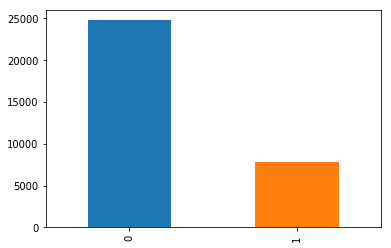

In [22]:
#Histogram of Income
df_train2['Income'].value_counts().plot(kind='bar')

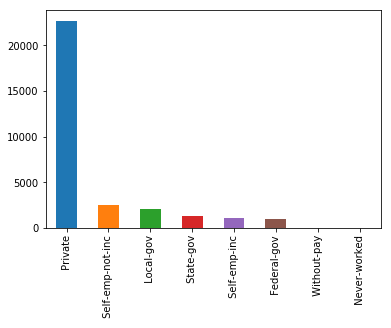

In [23]:
#Histogram of categorical variables - Workclass
df_train2['Workclass'].value_counts().plot(kind='bar')

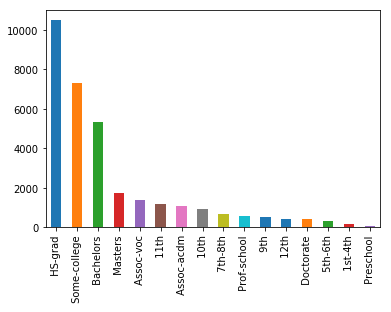

In [24]:
#Histogram of categorical variables - Education
df_train2['Education'].value_counts().plot(kind='bar')

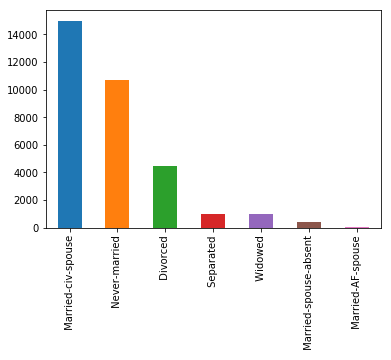

In [25]:
#Histogram of categorical variables - Marital-Status
df_train2['Marital-Status'].value_counts().plot(kind='bar')

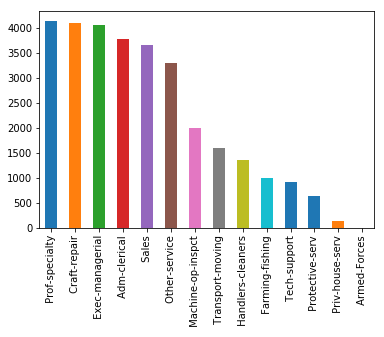

In [26]:
#Histogram of categorical variables - Occupation
df_train2['Occupation'].value_counts().plot(kind='bar')

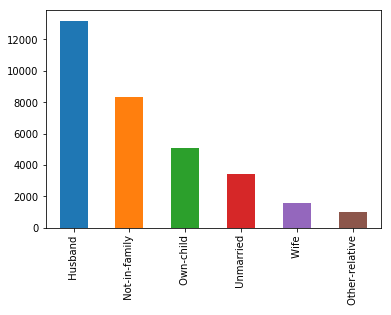

In [27]:
#Histogram of categorical variables - Relationship
df_train2['Relationship'].value_counts().plot(kind='bar')

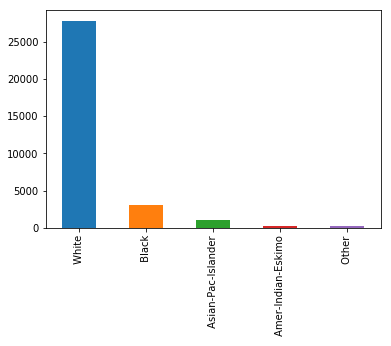

In [28]:
#Histogram of categorical variables - Race
df_train2['Race'].value_counts().plot(kind='bar')

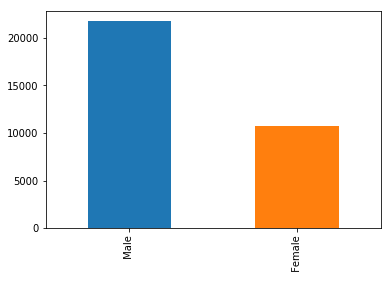

In [29]:
#Histogram of categorical variables - Sex
df_train2['Sex'].value_counts().plot(kind='bar')

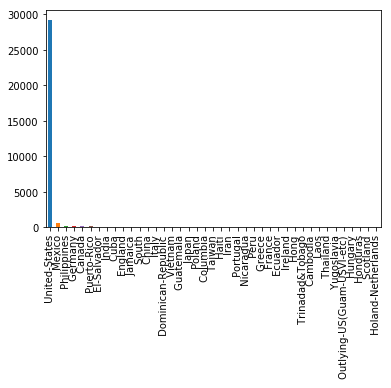

In [30]:
#Histogram of categorical variables - Native Country
df_train2['Country'].value_counts().plot(kind='bar')

In [31]:
#BIVARIATE ANALYSIS

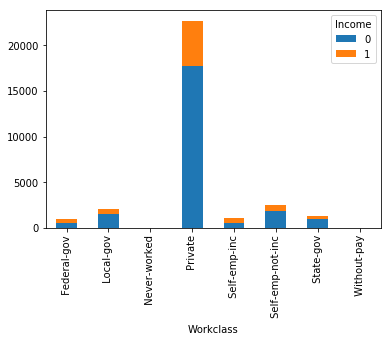

In [32]:
#Workclass vs Income
df_train2.groupby(['Workclass', 'Income']).size().unstack().plot(kind='bar', stacked=True)

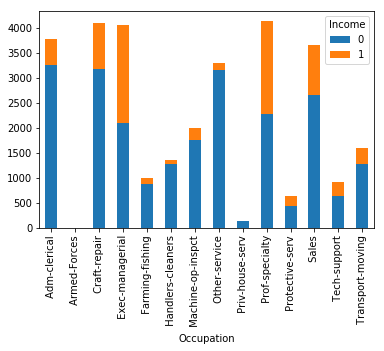

In [33]:
#Occupation vs Income
df_train2.groupby(['Occupation', 'Income']).size().unstack().plot(kind='bar', stacked=True)

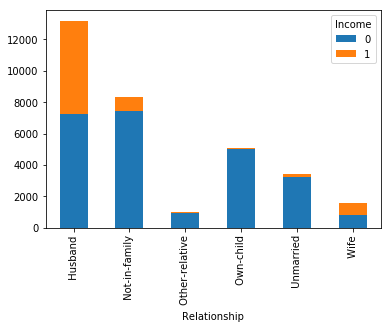

In [34]:
#Relationship vs Income
df_train2.groupby(['Relationship', 'Income']).size().unstack().plot(kind='bar', stacked=True)

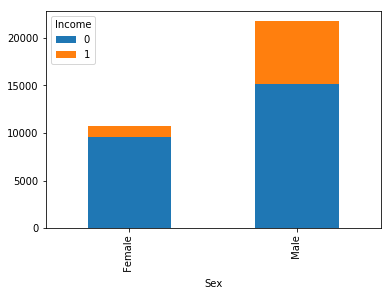

In [35]:
#Sex vs Income
df_train2.groupby(['Sex', 'Income']).size().unstack().plot(kind='bar', stacked=True)

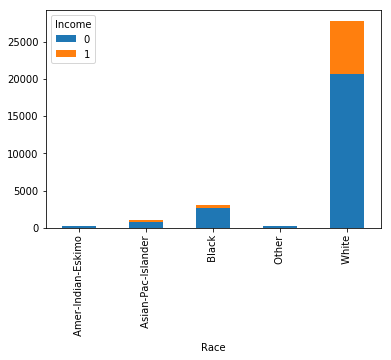

In [36]:
#Race vs Income
df_train2.groupby(['Race', 'Income']).size().unstack().plot(kind='bar', stacked=True)

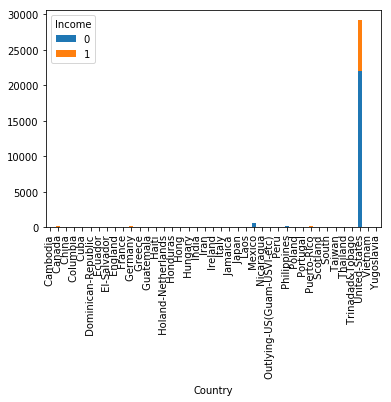

In [37]:
#Country vs Income
df_train2.groupby(['Country', 'Income']).size().unstack().plot(kind='bar', stacked=True)

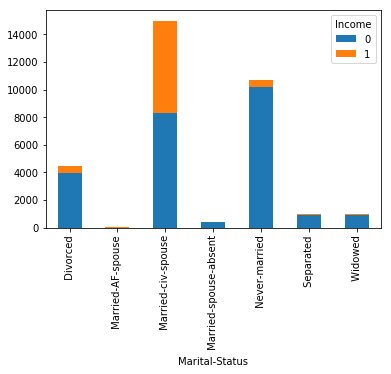

In [38]:
#Marital-Status vs Income
df_train2.groupby(['Marital-Status', 'Income']).size().unstack().plot(kind='bar', stacked=True)

In [39]:
#MULTIVARIATE ANALYSIS

In [40]:
#Create correlation matrix for the numeric variables
corr = df_train2.corr()
corr.style.background_gradient().set_precision(2)

,Income,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
Income,1,0.23,-0.0095,0.34,0.22,0.15,0.23
Age,0.23,1,-0.077,0.037,0.078,0.058,0.069
Fnlwgt,-0.0095,-0.077,1,-0.043,0.00043,-0.01,-0.019
Education-Num,0.34,0.037,-0.043,1,0.12,0.08,0.15
Capital-Gain,0.22,0.078,0.00043,0.12,1,-0.032,0.078
Capital-Loss,0.15,0.058,-0.01,0.08,-0.032,1,0.054
Hours-Per-Week,0.23,0.069,-0.019,0.15,0.078,0.054,1


In [41]:
#Identify duplicate rows
df_train2[df_train2.duplicated(keep='first')]

,Income,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Country
4881,0,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico
5104,0,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States
9171,0,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States
11631,0,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States
13084,0,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala
15059,0,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico
17040,0,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
18555,0,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN
18698,0,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States
21318,0,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States


In [42]:
#Count number of duplicate rows/values
df_train2[df_train2.duplicated(keep='first')].count()

Income            24
Age               24
Workclass         24
Fnlwgt            24
Education         24
Education-Num     24
Marital-Status    24
Occupation        24
Relationship      24
Race              24
Sex               24
Capital-Gain      24
Capital-Loss      24
Hours-Per-Week    24
Country           23
dtype: int64

In [43]:
#Drop duplicated rows
df_train3=df_train2.drop_duplicates(subset=None, keep='first', inplace=False)

In [44]:
#Check that we dont have anymore duplicated rows
df_train3[df_train3.duplicated(keep='first')].count()

Income            0
Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-Num     0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-Per-Week    0
Country           0
dtype: int64

In [45]:
#Checking how many missing values are left once duplicated values are removed
df_train3.isnull().sum()

Income               0
Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-Num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-Per-Week       0
Country            582
dtype: int64

In [46]:
#Drop rows where 'Occupation' is missing
df_train4=df_train3.dropna(axis=0, how='any', thresh=None, subset=['Occupation'], inplace=False)

In [47]:
#Checking how many missing values are left once rows missing 'Occupation' are dropped
df_train4.isnull().sum()

Income              0
Age                 0
Workclass           0
Fnlwgt              0
Education           0
Education-Num       0
Marital-Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital-Gain        0
Capital-Loss        0
Hours-Per-Week      0
Country           555
dtype: int64

In [48]:
#Note, removing rows where 'Occupation' is missing, also removes all rows where 'Workclass' is missing

In [49]:
#Replace missing 'Country' values with 'United-States
df_train5=df_train4.fillna('United States')

In [50]:
#Check that there are no missing values left
df_train5.isnull().sum()

Income            0
Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-Num     0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-Per-Week    0
Country           0
dtype: int64

In [51]:
#Ask the professor about feature description and how to address outliers

In [52]:
#Making a copy of the dataset for the purposes of trying one-hot encoding
df_copy=df_train5.copy()

In [53]:
#Applying one-hot encoding the get dummy variables for each of the categorical variables

df_one_hot=pd.get_dummies(df_copy, columns=["Workclass", "Education","Marital-Status","Occupation","Relationship","Race","Sex","Country"], prefix=["Workclass", "Education","Marital-Status","Occupation","Relationship","Race","Sex","Country"])


In [54]:
#Examening the new dataframe and the total number of columns
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30694 entries, 0 to 32560
Columns: 106 entries, Income to Country_United States
dtypes: int64(7), uint8(99)
memory usage: 4.8 MB


In [55]:
#Use decision tree Classifier to rank each features based on importance
array = df_one_hot.values
X = array[:,1:]
Y = array[:,0]
model=DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

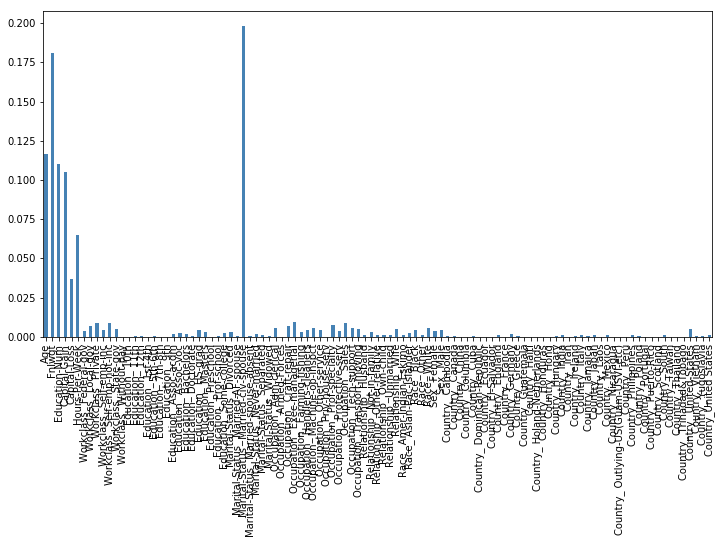

In [56]:
#Plotting all the features and their importance
pd.Series(model.feature_importances_, index=df_one_hot.columns[1:]).plot.bar(color='steelblue', figsize=(12, 6))

In [57]:
#Listing all the features and their importance
pd.Series(model.feature_importances_, index=df_one_hot.columns[1:]).sort_values(ascending=False)

Marital-Status_ Married-civ-spouse     0.198065
Fnlwgt                                 0.181024
Age                                    0.116297
Education-Num                          0.109979
Capital-Gain                           0.104860
Hours-Per-Week                         0.065222
Capital-Loss                           0.037048
Occupation_ Exec-managerial            0.009355
Workclass_ Private                     0.009067
Workclass_ Self-emp-not-inc            0.008832
Occupation_ Sales                      0.008581
Occupation_ Prof-specialty             0.007717
Occupation_ Craft-repair               0.006888
Workclass_ Local-gov                   0.006595
Race_ White                            0.005866
Occupation_ Adm-clerical               0.005850
Occupation_ Machine-op-inspct          0.005628
Occupation_ Tech-support               0.005322
Occupation_ Transport-moving           0.005068
Country_ United-States                 0.004979
Relationship_ Wife                     0

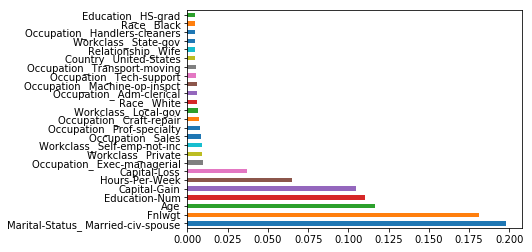

In [58]:
#To increase readability, plotting the top 25 most important features
feat_importances =pd.Series(model.feature_importances_, index=df_one_hot.columns[1:])
feat_importances.nlargest(25).plot(kind='barh')

In [59]:
#Ask the professor about what features to remove

In [60]:
#Making a copy of the dataset for the purposes of trying PCA
df_copy2=df_one_hot.copy()

In [61]:
#Applying PCA tfor the purposes of feature selection
A = df_copy2.drop('Income', 1)  
b = df_copy2['Income']  
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=0) 
sc = StandardScaler()  
A_train = sc.fit_transform(A_train)  
A_test = sc.transform(A_test)
pca = PCA()  
A_train = pca.fit_transform(A_train)  
A_test = pca.transform(A_test)
pca.explained_variance_ratio_

array([4.34405700e-02, 2.93512287e-02, 2.46681205e-02, 2.24464832e-02,
       1.82816440e-02, 1.70778818e-02, 1.61526552e-02, 1.50022952e-02,
       1.36624055e-02, 1.33006367e-02, 1.26571513e-02, 1.23886225e-02,
       1.19599248e-02, 1.19134463e-02, 1.16514916e-02, 1.15199565e-02,
       1.12011001e-02, 1.11181356e-02, 1.09698971e-02, 1.07619978e-02,
       1.06958503e-02, 1.06786543e-02, 1.05615039e-02, 1.04578195e-02,
       1.04255997e-02, 1.03604752e-02, 1.03227722e-02, 1.03143541e-02,
       1.01986181e-02, 1.01376956e-02, 1.00853279e-02, 1.00442082e-02,
       1.00177619e-02, 9.93726383e-03, 9.89202728e-03, 9.84781134e-03,
       9.84045108e-03, 9.80181659e-03, 9.75388141e-03, 9.69248769e-03,
       9.67539502e-03, 9.65023949e-03, 9.62950560e-03, 9.59715757e-03,
       9.58244621e-03, 9.55960436e-03, 9.55027320e-03, 9.54119375e-03,
       9.53944698e-03, 9.53361059e-03, 9.52849681e-03, 9.52306339e-03,
       9.51008743e-03, 9.49919164e-03, 9.49475945e-03, 9.49015776e-03,
      

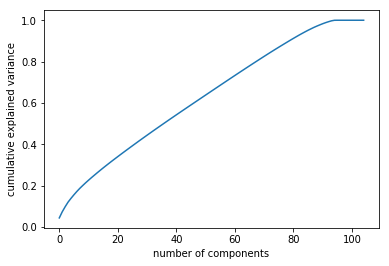

In [62]:
#Examine how many components are needed in order to explain variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');